In [1]:
#from collections import Counter
import csv
names = []
pos = 0
neg = 0

with open( 'D:\\Research\\testingTweets_Classes.csv', "rb" ) as theFile:
    reader = csv.DictReader( theFile )
    for row in reader:
        names.append(row)

# Infer Gender

**Getting census data names**

In [2]:
# Fetch census name data from:
# http://www.census.gov/genealogy/www/data/1990surnames/index.html

import requests
males_url = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.male.first'
females_url = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.female.first'
males = (requests.get(males_url).text.split('\n'))[:233]
females = (requests.get(females_url).text.split('\n'))[:525]
print 'males:\n', '\n'.join(males[:10]), '\n',len(males), 'male names'
print '\nfemales:\n', '\n'.join(females[:10]),'\n', len(females), 'female names'

males:
JAMES          3.318  3.318      1
JOHN           3.271  6.589      2
ROBERT         3.143  9.732      3
MICHAEL        2.629 12.361      4
WILLIAM        2.451 14.812      5
DAVID          2.363 17.176      6
RICHARD        1.703 18.878      7
CHARLES        1.523 20.401      8
JOSEPH         1.404 21.805      9
THOMAS         1.380 23.185     10 
233 male names

females:
MARY           2.629  2.629      1
PATRICIA       1.073  3.702      2
LINDA          1.035  4.736      3
BARBARA        0.980  5.716      4
ELIZABETH      0.937  6.653      5
JENNIFER       0.932  7.586      6
MARIA          0.828  8.414      7
SUSAN          0.794  9.209      8
MARGARET       0.768  9.976      9
DOROTHY        0.727 10.703     10 
525 female names


In [3]:
# Get just names. 
male_names = set([m.split()[0].lower() for m in males if m])
female_names = set([f.split()[0].lower() for f in females if f])

print 'males:\n', '\n'.join(list(male_names)[:10])
print '\nfemales:\n', '\n'.join(list(female_names)[:10])

males:
tim
thomas
alvin
jason
ron
lewis
charles
lester
steve
roy

females:
cynthia
sonja
hilda
laura
marion
colleen
kate
emily
jessie
rhonda


In [4]:
# What about ambiguous names?

def remove_ambiguous_names(male_names, female_names):
    ambiguous = [n for n in male_names if n in female_names]
    for a in ambiguous:
        if a in male_names and a in female_names:
            male_names.remove(a)
            female_names.remove(a)
    print 'found %d ambiguous names:\n'% len(ambiguous)
    print '\n'.join(ambiguous[:20])
    
remove_ambiguous_names(male_names, female_names)

found 7 ambiguous names:

jamie
leslie
willie
francis
angel
terry
lee


In [5]:
#Check if ambiguous names were eliminated
print [n for n in male_names if n in female_names]

[]


In [6]:
#labeling tweets according to first names of users

def gender_by_name(tweets, male_names, female_names):
    for t in tweets:
        if len(t['real_name'])>1:
            first = t['real_name'].split()[0].lower()
        else:
            first = t['real_name'].lower()
        if first in male_names:
            t['gender'] = 'male'
        elif first in female_names:
            t['gender'] = 'female'
        else:
            t['gender'] = 'unknown'

gender_by_name(names, male_names, female_names)
print names[1]['gender']

male


In [19]:
#Genders by class

from collections import Counter

def print_genders_positive(tweets):
    return Counter([t['gender'] for t in tweets if t['class']=='1'])
    #for t in tweets[:20]:
    #    print t['gender'], t['real_name']

def print_genders_negative(tweets):
    return Counter([t['gender'] for t in tweets if t['class']=='0'])
    #for t in tweets[:20]:
    #    print t['gender'], t['real_name']
        
        
print 'Positive: ', print_genders_positive(names)
print 'Negative: ', print_genders_negative(names)


Positive:  Counter({'unknown': 190828, 'male': 43775, 'female': 31228})
Negative:  Counter({'unknown': 542789, 'male': 113127, 'female': 70886})


In [8]:
# Who are the unknowns?
# "Filtered" data can have big impact on analysis.

unknown_names = Counter(t['real_name']
                        for t in names if t['gender'] == 'unknown')
print '\n'.join(str(x) for x in unknown_names.most_common(20))

('Electronic Cigarette', 15270)
('Dragonfly Ecigs', 14278)
('Lewisville E Cig', 4837)
('g james', 4541)
('Vapornine', 4105)
("DFW Vapor's Store", 2901)
('RokkiMoon', 2301)
('RoyalVapor', 2183)
('Lesley Anna Lawless', 1962)
('vereybowring', 1455)
('CouponAndDiscount', 1404)
('Proper Longboards', 1351)
('Caerulea Sea', 1176)
('vapers.it', 1116)
('', 1086)
('FlamingKaty', 962)
('Dorsey List', 936)
('NgTrader.co.uk', 917)
('vapourworld.co.uk', 891)
('?????', 865)


In [9]:
# How do the profiles of male Twitter users differ from
# those of female users?

male_profiles = [t['user_bio_summary'] for t in names
                if t['gender'] == 'male']

female_profiles = [t['user_bio_summary'] for t in names
                if t['gender'] == 'female']

import re
def tokenize(s):
    return re.sub('\W+', ' ', s).lower().split()

male_words = Counter()
female_words = Counter()

for p in male_profiles:
    male_words.update(Counter(tokenize(p)))
                      
for p in female_profiles:
    female_words.update(Counter(tokenize(p)))

print 'Most Common Male Terms:\n', \
    '\n'.join(str(x) for x in male_words.most_common(10))
    
print '\nMost Common Female Terms:\n', \
    '\n'.join(str(x) for x in female_words.most_common(10))

Most Common Male Terms:
('and', 49820)
('i', 40595)
('the', 31287)
('a', 23995)
('of', 22705)
('to', 21280)
('my', 20708)
('for', 19906)
('in', 16666)
('you', 11569)

Most Common Female Terms:
('i', 34720)
('and', 30629)
('the', 24178)
('a', 23177)
('to', 18615)
('of', 16271)
('my', 15296)
('in', 11788)
('is', 11350)
('you', 11191)


In [10]:
# Compute difference
diff_counts = dict([(w, female_words[w] - male_words[w])
                    for w in
                    set(female_words.keys()) | set(male_words.keys())])

sorted_diffs = sorted(diff_counts.items(), key=lambda x: x[1])

print 'Top Male Terms (diff):\n', \
    '\n'.join(str(x) for x in sorted_diffs[:10])

print '\nTop Female Terms (diff):\n', \
    '\n'.join(str(x) for x in sorted_diffs[-10:])

Top Male Terms (diff):
('and', -19191)
('for', -12424)
('the', -7109)
('of', -6434)
('i', -5875)
('my', -5412)
('at', -5329)
('vaper', -5220)
('in', -4878)
('casaa', -4852)

Top Female Terms (diff):
('topic', 944)
('mandy', 947)
('coffee', 992)
('get', 1016)
('mother', 1029)
('addict', 1040)
('mom', 1295)
('girl', 1660)
('love', 1683)
('health', 2014)


In [11]:
def counts_to_probs(gender_words):
    """ Compute probability of each term according to the frequency
    in a gender. """
    total = 1. * sum(gender_words.values())
    return dict([(word, count / total)
                 for word, count in gender_words.items()])

male_probs = counts_to_probs(male_words)
female_probs = counts_to_probs(female_words)
print sorted(male_probs.items(), key=lambda x: -x[1])[:10]

[('and', 0.031813781459372616), ('i', 0.025922931721060444), ('the', 0.019979080299465896), ('a', 0.015322595064585425), ('of', 0.014498833962967788), ('to', 0.013588865304204119), ('my', 0.013223600691703896), ('for', 0.012711463944806729), ('in', 0.010642482573301967), ('you', 0.007387668360166234)]


In [12]:
# Additive smoothing. Add count of 1 for all words.
all_words = set(male_words) | set(female_words)
male_words.update(all_words)  
female_words.update(all_words)

male_probs = counts_to_probs(male_words)
female_probs = counts_to_probs(female_words)
print '\n'.join(str(x) for x in 
                sorted(male_probs.items(), key=lambda x: -x[1])[:10])

('and', 0.029659629541874483)
('i', 0.02416776702358316)
('the', 0.018626492625723468)
('a', 0.01428539110990988)
('of', 0.013517423343124427)
('to', 0.0126690868565591)
('my', 0.012328561614232526)
('for', 0.011851111886355058)
('in', 0.009922262611638104)
('you', 0.006887896947060232)


In [13]:
def odds_ratios(male_probs, female_probs):
    return dict([(w, female_probs[w] / male_probs[w])
                 for w in set(male_probs) | set(female_probs)])

ors = odds_ratios(male_probs, female_probs)

sorted_ors = sorted(ors.items(), key=lambda x: -x[1])

print 'Top Female Terms (OR):\n', \
    '\n'.join(str(x) for x in sorted_ors[:10])

print '\nTop Male Terms (OR):\n', \
    '\n'.join(str(x) for x in sorted_ors[-10:])

Top Female Terms (OR):
('mandy', 1337.4475985063418)
('snowcentre', 547.3941647895155)
('wang120899', 411.9564332952023)
('skyp', 366.810522797098)
('vapenstein', 334.36189962658545)
('diets', 328.71866081432245)
('cont', 320.2538025959279)
('l2i2wzt7', 318.84299289286207)
('bdcmg', 308.96732497140175)
('batteries', 256.2970960569467)

Top Male Terms (OR):
('statistical', 0.0029514847344472)
('tpd', 0.0023592135502771934)
('ecigy', 0.002012567336755723)
('hammers', 0.0015623584751558823)
('bongonaut', 0.0015301623677502838)
('actively', 0.001513744316594165)
('swof', 0.0008488626372236834)
('bii', 0.0007068184885099006)
('gconley', 0.0005871034969062678)
('casaa', 0.0002907087787071423)


In [20]:
c1 = print_genders_positive(names)
c2 = print_genders_negative(names)
print 'Positive: ', c1, '\nNegative:', c2

Positive:  Counter({'unknown': 190828, 'male': 43775, 'female': 31228}) 
Negative: Counter({'unknown': 542789, 'male': 113127, 'female': 70886})


In [21]:
import plotly.plotly as py
from plotly.graph_objs import *

import plotly.plotly as py              # for sending things to plotly
import plotly.tools as tls              # for mpl, config, etc.
from plotly.graph_objs import *         # __all__ is safely defined
py.sign_in('elaine_resende', 'qvxpg7lfcd')   # get your own at https://plot.ly/

trace1 = Bar(
    x=c1.keys(),
    y=c1.values(),
    name='Positive tweets'
)
trace2 = Bar(
    x=c2.keys(),
    y=c2.values(),
    name='Negative Tweets'
)
data = Data([trace1, trace2])
layout = Layout(
    barmode='group'
)
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='grouped-bar')

In [93]:
import plotly.tools as tls
tls.embed("https://plot.ly/~elaine_resende/3/genders-by-sentiment/?share_key=DcMWdxDgYNqHaFpHJz8r2m")

In [97]:
# Save these tweets.
import pickle
pickle.dump(names, open('tweets.pkl', 'wb'))

In [98]:
# Load these tweets
import pickle
tweets = pickle.load(open('tweets.pkl', 'rb'))

In [103]:
print tweets[1]['real_name'], tweets[1]['gender'], tweets[1]['class'], tweets[1]['text']

Steven Barry male 0 nickdrake: C3P0 Enjoys a cigarette break during filming. http://t.co/AVCtEml4


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


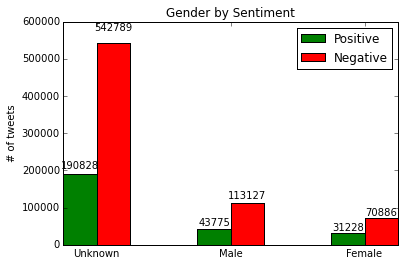

In [85]:
#!/usr/bin/env python
# a bar plot with errorbars
# http://matplotlib.org/examples/api/barchart_demo.html
import numpy as np
import matplotlib.pyplot as plt
% pylab inline

ind = np.arange(3)  # locations for the groups
width = 0.25       # width of the bars

fig, ax = plt.subplots()
bar1 = ax.bar(ind, c1.values(), width, color='green')
bar2 = ax.bar(ind+width, c2.values(), width, color='red')

# add some text for labels, title and axes ticks
ax.set_ylabel('# of tweets')
ax.set_title('Gender by Sentiment')
ax.set_xticks(ind+width)
ax.set_xticklabels( [c1.keys()[0].title(),c1.keys()[1].title(),c1.keys()[2].title()])

ax.legend( (bar1[0], bar2[0]), ('Positive','Negative') )

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.show()